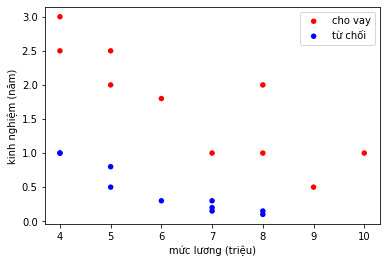

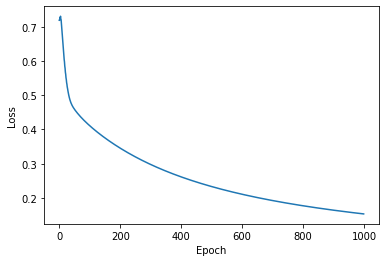

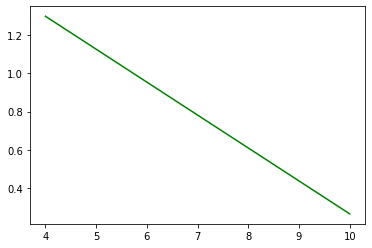

In [1]:
# Thêm thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Load data từ file csv
data_path = "drive/My Drive/Colab/Logistic regression/dataset.csv"
data=pd.read_csv(data_path)
N, d = data.shape

x = data.iloc[:, 0:d-1]
x = x.values.reshape(-1, d-1)
y = data.iloc[:, 2]
y = y.values.reshape(-1, 1)

# Vẽ data bằng scatter
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.show()
# Thêm cột 1 vào dữ liệu x
x = np.hstack((np.ones((N, 1)), x))

w = np.array([0.,0.1,0.1]).reshape(-1,1)

# Số lần lặp bước 2
numOfIteration = 1000
cost = np.zeros((numOfIteration,1))
learning_rate = 0.01
epoch = []
for i in range(numOfIteration):
    
	 # Tính giá trị dự đoán
    y_predict = sigmoid(np.dot(x, w))
    cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
    # Gradient descent
    w = w - learning_rate * np.dot(x.T, y_predict-y)	 
    epoch.append(i)

loss = cost*(1/N)
plt.plot(epoch,loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
t = 0.5
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()
